In [446]:
import pandas as pd 
import numpy as np
lifeEx = pd.read_csv('Life-Expectancy-Data-Updated.csv')

In [447]:
print('SORTED DATAFRAME')
NLifeEx = lifeEx.sort_values(by = ['Country', 'Year'], ascending = [True, True], na_position = 'first')
NLifeEx

SORTED DATAFRAME


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
68,Afghanistan,Asia,2000,90.5,129.2,310.8305,0.02,62,12,21.7,...,24,0.02,148,20.78,2.3,2.5,2.2,0,1,55.8
1693,Afghanistan,Asia,2001,87.9,125.2,304.8580,0.02,63,13,21.8,...,33,0.02,163,21.61,2.1,2.4,2.2,0,1,56.3
679,Afghanistan,Asia,2002,85.3,121.1,298.8855,0.02,64,14,21.9,...,36,0.02,320,22.60,19.9,2.2,2.3,0,1,56.8
1221,Afghanistan,Asia,2003,82.7,116.9,292.0365,0.02,65,15,22.0,...,41,0.02,332,23.68,19.7,19.9,2.4,0,1,57.3
1147,Afghanistan,Asia,2004,80.0,112.6,285.1880,0.02,67,16,22.1,...,50,0.02,323,24.73,19.5,19.7,2.5,0,1,57.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Zimbabwe,Africa,2011,50.8,80.8,466.2650,3.91,94,64,23.7,...,93,6.05,1249,12.89,6.8,6.7,7.3,0,1,52.9
1489,Zimbabwe,Africa,2012,46.5,72.2,423.4420,3.93,97,64,23.7,...,95,5.13,1432,13.12,6.5,6.4,7.9,0,1,55.0
1201,Zimbabwe,Africa,2013,44.8,66.3,405.0080,4.11,95,64,23.7,...,95,4.77,1435,13.35,6.2,6.0,8.0,0,1,56.9
1005,Zimbabwe,Africa,2014,42.9,62.7,386.5745,4.22,91,64,23.8,...,91,4.29,1444,13.59,5.9,5.7,8.2,0,1,58.4


In [448]:
import seaborn as sns
import matplotlib.pyplot as plt

In [449]:
#Checking for any NANS
NLifeEx.isnull().values.any()

False

<AxesSubplot:xlabel='Life_expectancy', ylabel='Count'>

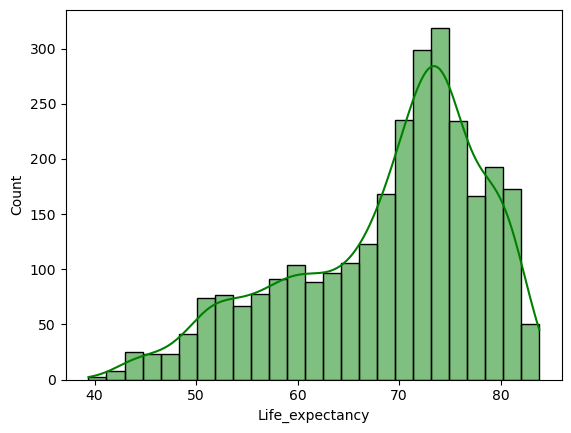

In [450]:
sns.histplot(NLifeEx['Life_expectancy'],kde = True, color='green')

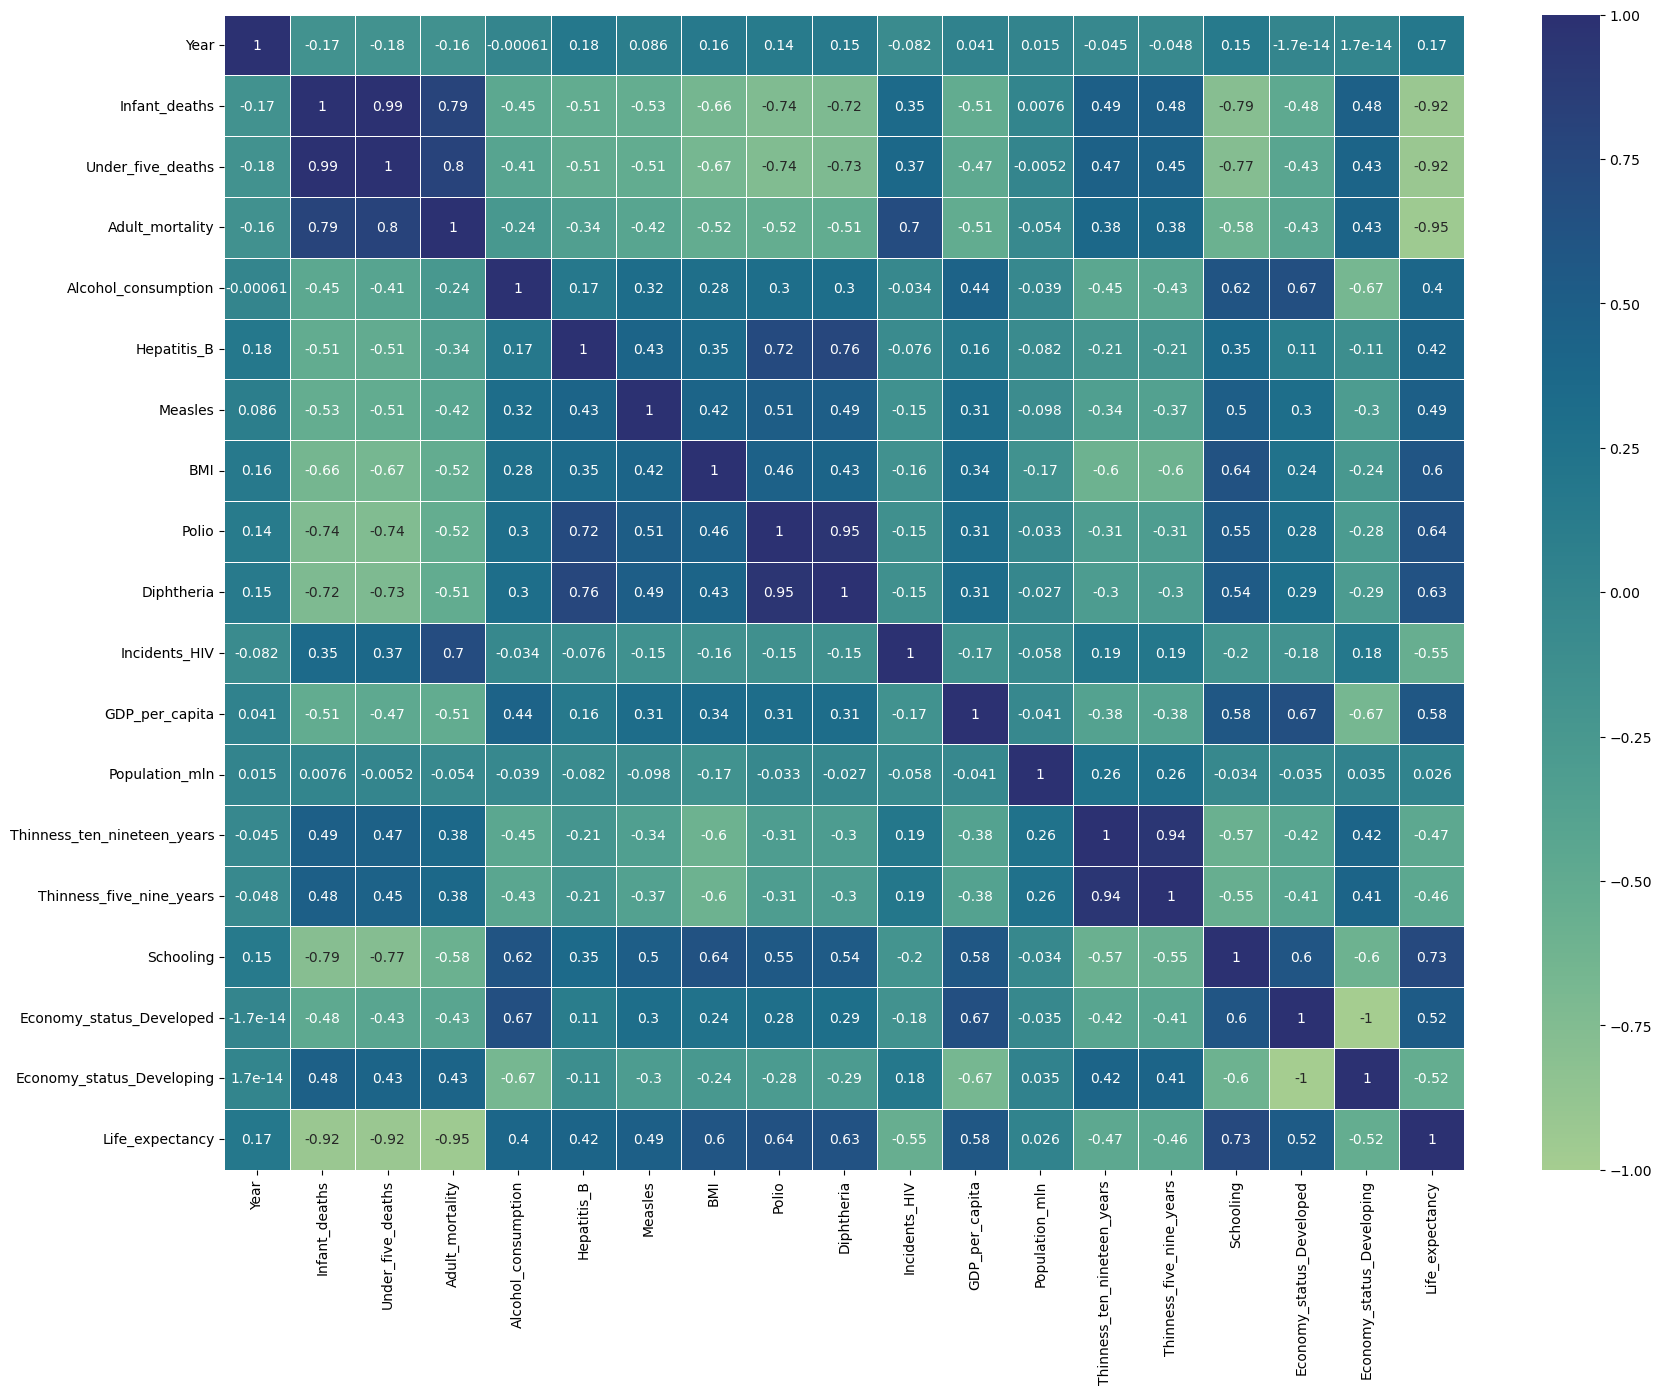

In [451]:
fig, ax = plt.subplots(figsize=(20,15))  
ax = sns.heatmap(NLifeEx.corr(), cmap="crest", annot=True, linewidth=.5)

In [452]:
#Paper Column drops
Dropped=NLifeEx.drop(['Region','Country','Year','Economy_status_Developing','Economy_status_Developed',
                      'Thinness_ten_nineteen_years',
                      'Thinness_five_nine_years','Population_mln','Hepatitis_B'], axis= 1)

In [453]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import recall_score, balanced_accuracy_score, f1_score, precision_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Regression testing using Linear, SGD, Elastic, DesctionTreeRegressor, and RandomForestRegressor

In [454]:
def plot_targets_against_preds(y, t_test):

    plt.plot(t_test, y, '.')


    plt.plot([0,100], [0, 100], 'r--')

    plt.xlim([10, 100])
    plt.ylim([10, 100])

    plt.xlabel("target")
    plt.ylabel("predicted")   

The score:  0.979595168830565
MAE: 1.064
r2: 0.980
MSE: 1.796


Text(0.5, 1.0, 'LinearRegression')

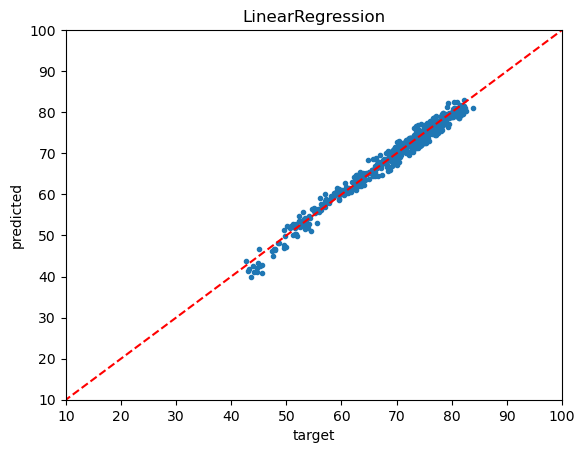

In [455]:
features = Dropped.iloc[:,:-1]
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)

model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)

score = model.score(x_test, y_test)
print("The score: ", score)

MAE = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % MAE) 

r2 = r2_score(y_test, pred)
print('r2: %.3f' % r2) 

MSE = mean_squared_error(y_test, pred)
print('MSE: %.3f' % MSE) 


plot_targets_against_preds(pred, y_test)
plt.title("LinearRegression")

The score:  -3.399968093198721e+30
MAE: 207870848443261760.000
r2: -1498532692764094078164145518149632.000
MSE: 131906008084110043825794567368605696.000


Text(0.5, 1.0, 'SGDRegressor')

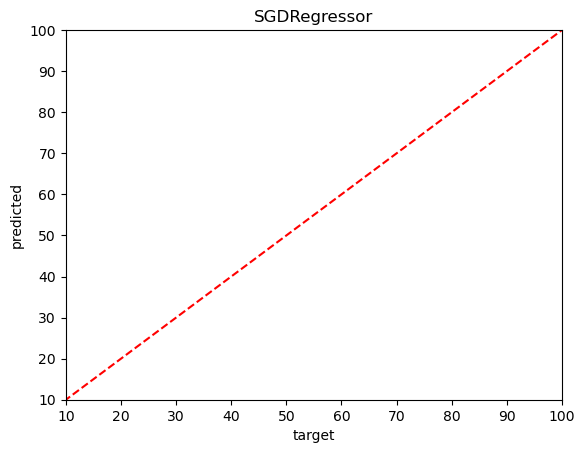

In [456]:
features = Dropped.iloc[:,:-1]
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)

model = linear_model.SGDRegressor(alpha=0.5)

model.fit(x_train, y_train)

predTwo = model.predict(x_test)

score = model.score(x_test, y_test)
print("The score: ", scoreSGDRegressor)

MAE = mean_absolute_error(y_test, predTwo)
print('MAE: %.3f' % MAE) 

r2 = r2_score(y_test, predTwo)
print('r2: %.3f' % r2) 

MSE = mean_squared_error(y_test, predTwo)
print('MSE: %.3f' % MSE) 

plot_targets_against_preds(predTwo, y_test)
plt.title("SGDRegressor")

The score:  0.9795933996610335
MAE: 1.064
r2: 0.980
MSE: 1.796


Text(0.5, 1.0, 'ElasticNet')

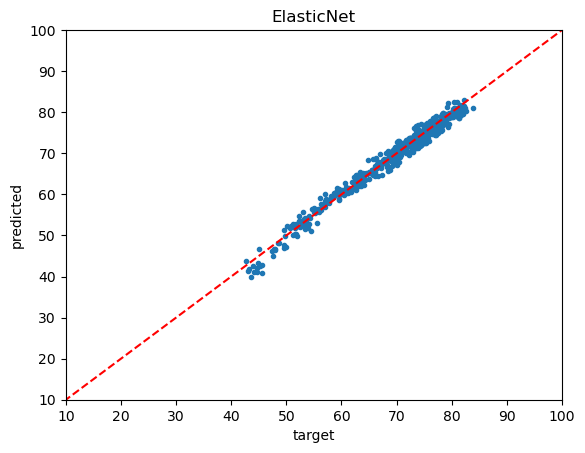

In [457]:
features = Dropped.iloc[:,:-1]
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)

model = linear_model.ElasticNet(alpha=0.01, l1_ratio=0.5)

model.fit(x_train, y_train)

predThree = model.predict(x_test)

score = model.score(x_test, y_test)
print("The score: ", score)

MAE = mean_absolute_error(y_test, predThree)
print('MAE: %.3f' % MAE) 

r2 = r2_score(y_test, predThree)
print('r2: %.3f' % r2) 

MSE = mean_squared_error(y_test, predThree)
print('MSE: %.3f' % MSE) 

plot_targets_against_preds(predThree, y_test)
plt.title("ElasticNet")

The score:  0.9914424669859078
MAE: 0.575
r2: 0.991
MSE: 0.753


Text(0.5, 1.0, 'DecisionTreeRegressor')

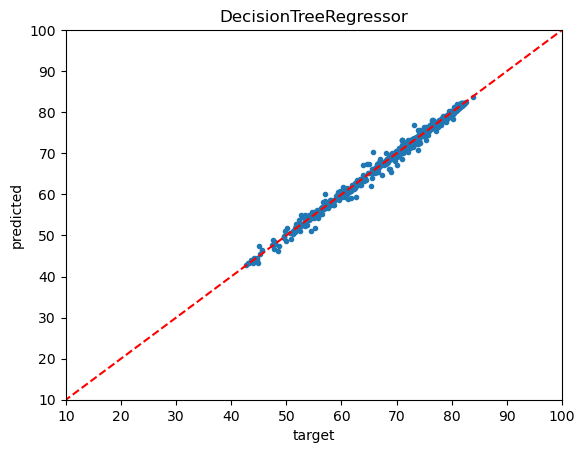

In [458]:
from sklearn.tree import DecisionTreeRegressor
features = Dropped.iloc[:,:-1]
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)
regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(x_train, y_train)

pred = regressor.predict(x_test)

score = regressor.score(x_test, y_test)
print("The score: ", score)

MAE = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % MAE) 

r2 = r2_score(y_test, pred)
print('r2: %.3f' % r2) 

MSE = mean_squared_error(y_test, pred)
print('MSE: %.3f' % MSE) 

plot_targets_against_preds(pred, y_test)
plt.title("DecisionTreeRegressor")

The score:  0.9965874410907016
MAE: 0.397
r2: 0.997
MSE: 0.300


Text(0.5, 1.0, 'RandomForestRegressor')

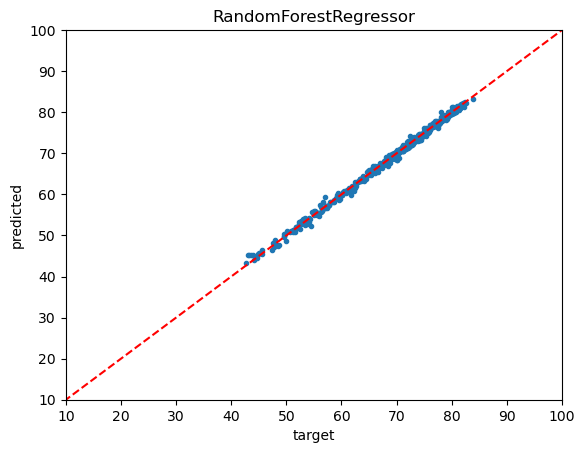

In [459]:
from sklearn.ensemble import RandomForestRegressor
features = Dropped.iloc[:,:-1]
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)
regr = RandomForestRegressor(max_depth=20, random_state=0)

regr.fit(x_train, y_train)

pred = regr.predict(x_test)

score = regr.score(x_test, y_test)
print("The score: ", score)

MAE = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % MAE) 

r2 = r2_score(y_test, pred)
print('r2: %.3f' % r2) 

mse = mean_squared_error(y_test, pred)
print('MSE: %.3f' % mse) 

plot_targets_against_preds(pred, y_test)
plt.title("RandomForestRegressor")

# Doing some feature selection for regression to see if there is improvement 

In [460]:
features = Dropped.iloc[:,:-1]
target = Dropped['Life_expectancy']

X_train, X_test, t_train, t_test = train_test_split(features, target,  test_size=0.2, random_state = 0)
vt = VarianceThreshold(threshold=(1000))
vt_X_train = vt.fit_transform(X_train)

pd.DataFrame(vt_X_train)
vt.get_feature_names_out()

array(['Under_five_deaths', 'Adult_mortality', 'GDP_per_capita'],
      dtype=object)

The score:  0.9759911894067382
MAE: 1.139
r2: 0.976
MSE: 2.113


Text(0.5, 1.0, 'LinearRegression with FS')

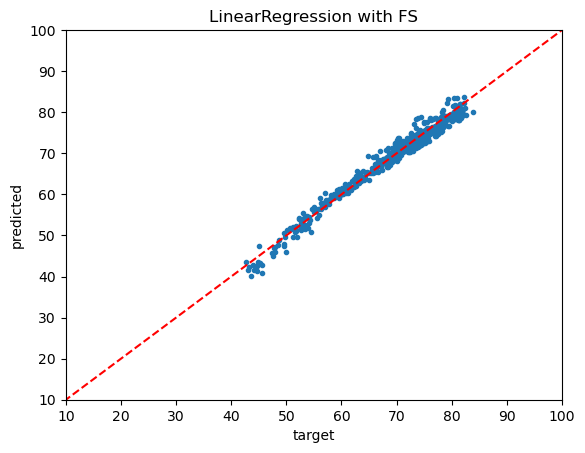

In [461]:
features = Dropped.loc[:, ['Adult_mortality','GDP_per_capita','Under_five_deaths']] 
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)

model = LinearRegression()
model.fit(x_train, y_train)

predFour = model.predict(x_test)

score = model.score(x_test, y_test)
print("The score: ", score)

mae = mean_absolute_error(y_test, predFour)
print('MAE: %.3f' % mae) 

r2 = r2_score(y_test, predFour)
print('r2: %.3f' % r2) 

mse = mean_squared_error(y_test, predFour)
print('MSE: %.3f' % mse) 


plot_targets_against_preds(predFour, y_test)
plt.title("LinearRegression with FS")

The score:  -1.0085073238454303e+31
MAE: 16718477534046790.000
r2: -10085073238454302902593161003008.000
MSE: 887722876213428193010972366995456.000


Text(0.5, 1.0, 'SGDRegressor with FS')

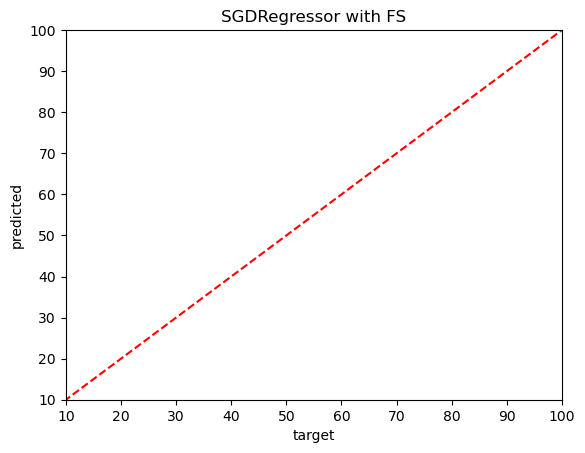

In [462]:
features = Dropped.loc[:, ['Adult_mortality','GDP_per_capita','Under_five_deaths']] 
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)

model = linear_model.SGDRegressor(alpha=0.5)

model.fit(x_train, y_train)

predFive = model.predict(x_test)

score = model.score(x_test, y_test)
print("The score: ", score)

mae = mean_absolute_error(y_test, predFive)
print('MAE: %.3f' % mae) 

r2 = r2_score(y_test, predFive)
print('r2: %.3f' % r2) 

mse = mean_squared_error(y_test, predFive)
print('MSE: %.3f' % mse) 

plot_targets_against_preds(predFive, y_test)    
plt.title("SGDRegressor with FS")

The score:  0.9759907401815677
MAE: 1.139
r2: 0.976
MSE: 2.113


Text(0.5, 1.0, 'ElasticNet with FS')

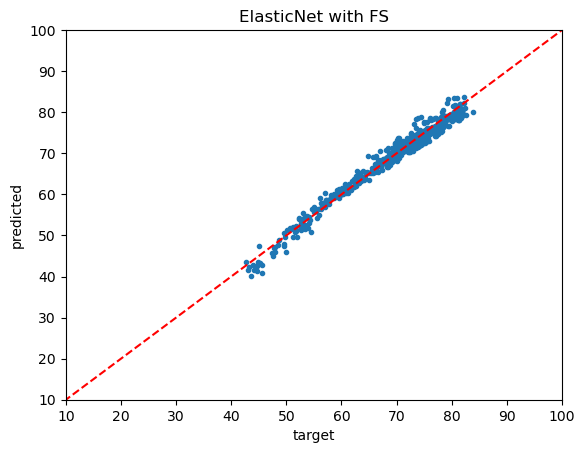

In [463]:
features = Dropped.loc[:, ['Adult_mortality','GDP_per_capita','Under_five_deaths']] 
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)

model = linear_model.ElasticNet(alpha=0.01, l1_ratio=0.5)

model.fit(x_train, y_train)

predSix = model.predict(x_test)

score = model.score(x_test, y_test)
print("The score: ", score)

mae = mean_absolute_error(y_test, predSix)
print('MAE: %.3f' % mae) 

r2 = r2_score(y_test, predSix)
print('r2: %.3f' % r2) 

mse = mean_squared_error(y_test, predSix)
print('MSE: %.3f' % mse) 

plot_targets_against_preds(predSix, y_test)
plt.title("ElasticNet with FS")

The score:  0.9931686477557302
MAE: 0.583
r2: 0.993
MSE: 0.601


Text(0.5, 1.0, 'RandomForestRegressor with FS')

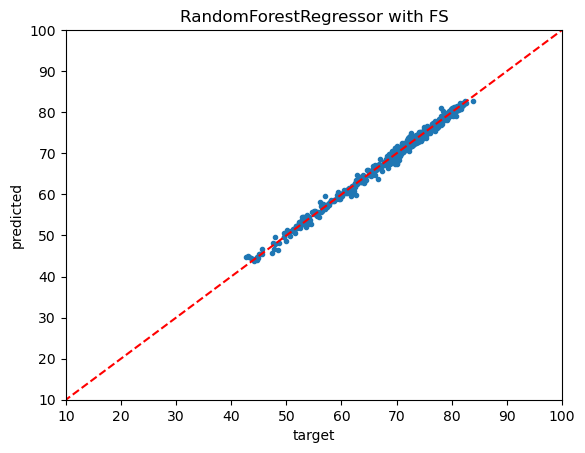

In [464]:
features = Dropped.loc[:, ['Adult_mortality','GDP_per_capita','Under_five_deaths']] 
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)
regr = RandomForestRegressor(max_depth=20, random_state=0)

regr.fit(x_train, y_train)

pred = regr.predict(x_test)

score = regr.score(x_test, y_test)
print("The score: ", score)

mae = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % mae) 

r2 = r2_score(y_test, pred)
print('r2: %.3f' % r2) 

mse = mean_squared_error(y_test, pred)
print('MSE: %.3f' % mse) 

plot_targets_against_preds(pred, y_test)
plt.title("RandomForestRegressor with FS")

The score:  0.9874700205869839
MAE: 0.701
r2: 0.987
MSE: 1.103


Text(0.5, 1.0, 'DecisionTreeRegressor with FS')

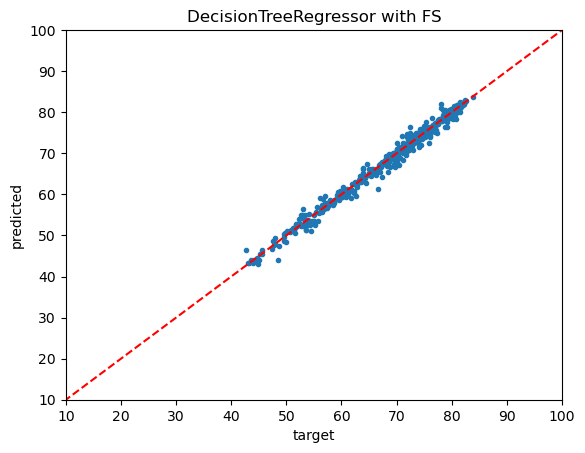

In [465]:
features = Dropped.loc[:, ['Adult_mortality','GDP_per_capita','Under_five_deaths']] 
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)
regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(x_train, y_train)

pred = regressor.predict(x_test)

score = regressor.score(x_test, y_test)
print("The score: ", score)

mae = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % mae) 

r2 = r2_score(y_test, pred)
print('r2: %.3f' % r2) 

mse = mean_squared_error(y_test, pred)
print('MSE: %.3f' % mse) 

plot_targets_against_preds(pred, y_test)
plt.title("DecisionTreeRegressor with FS")

The performance obeserved showed a decrease for all regression models except SGD 

# Changing the Life Expectancy column to non continuous 

In [466]:
Dropped['Life_expectancy'] = np.where(Dropped['Life_expectancy'] > 80, 1, Dropped['Life_expectancy'])

In [467]:
Dropped['Life_expectancy'] = np.where(Dropped['Life_expectancy'] > 70, 2, Dropped['Life_expectancy'])

In [468]:
Dropped['Life_expectancy'] = np.where(Dropped['Life_expectancy'] > 60, 3, Dropped['Life_expectancy'])

In [469]:
Dropped['Life_expectancy'] = np.where(Dropped['Life_expectancy'] > 40, 4, Dropped['Life_expectancy'])

In [470]:
Dropped['Life_expectancy'] = np.where(Dropped['Life_expectancy'] > 4, 5, Dropped['Life_expectancy'])

# Using Linear Classification testing (LogisticRegression and SVM)

=======================SVM========================
Train Accuracy: 0.8681798341335661
Test Accuracy: 0.881326352530541


C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


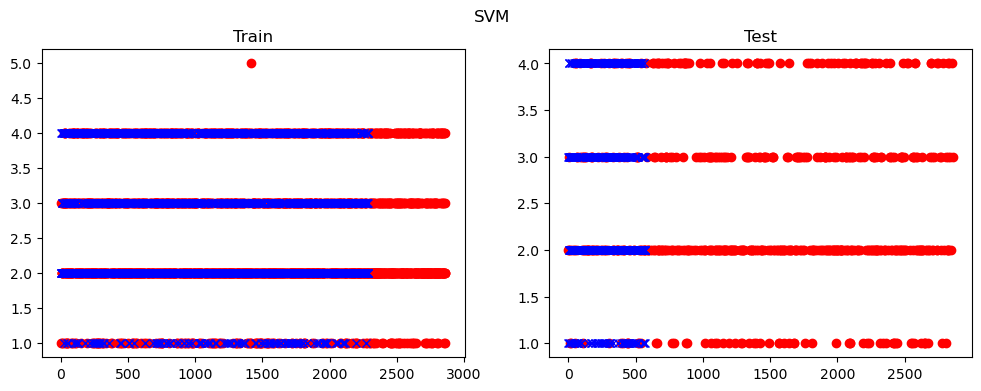

===================Logistic Reg===================
Train Accuracy: 0.8686163247490178
Test Accuracy: 0.849912739965096


C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

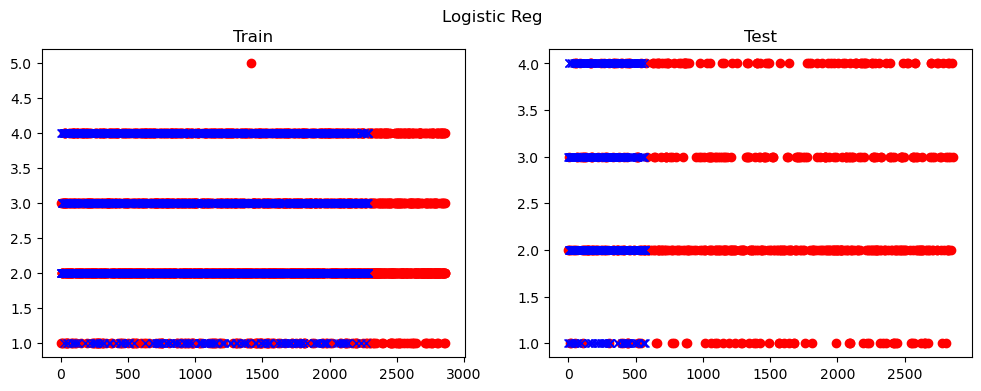

In [471]:
features = Dropped.iloc[:,:-1]
target = Dropped['Life_expectancy']


X_train, X_test, t_train, t_test = train_test_split(features, target,  test_size=0.2, random_state = 0)


svm = Pipeline([('scaler', StandardScaler()), 
                ('classifier', LinearSVC(tol=1e-3, random_state=0))])
logreg = LogisticRegression(random_state=0)
clfs = [svm, logreg]
names = ["SVM", "Logistic Reg"]


for name, clf in zip(names, clfs):
    print("{:=^50s}".format(name))
    
    clf = OneVsRestClassifier(clf)

    clf.fit(X_train, t_train)

    train_score = clf.score(X_train, t_train)

    test_score = clf.score(X_test, t_test)
   
    
    print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}")
    
    y_train = clf.predict(X_train)
    
    y_test = clf.predict(X_test)
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    plt.plot(t_train, 'ro')
    plt.plot(y_train, 'bx')
    plt.title("Train")
    
    plt.subplot(122)
    plt.plot(t_test, 'ro')
    plt.plot(y_test, 'bx')
    plt.title("Test")
    plt.suptitle(name)
    plt.show()

The regression performs better than linear classification 

# Trying other classification models 

In [472]:
def evaluation_report(model, data, verbose=True):
    X_train, X_test, t_train, t_test = data
    
    train_score = model.score(data[0], data[2])
    test_score = model.score(data[1], data[3])
    if verbose:
        print("{}\n===========================\n".format(model.__class__.__name__))
        print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")
    return train_score, test_score

In [473]:
features = Dropped.iloc[:,:-1]
target = Dropped['Life_expectancy']
X_train, X_test, t_train, t_test = train_test_split(features, target, test_size=0.20, random_state=0)



rf = RandomForestClassifier(warm_start=True, oob_score=True, random_state=0) 
rf.fit(X_train, t_train)



data = (X_train, X_test, t_train, t_test)
train_score, test_score = evaluation_report(rf, data, True)

y_rfpred = rf.predict(X_test)


print('recall_score: %.3f' % recall_score(t_test, y_rfpred,average='weighted'))

print('f1_score: %.3f' % f1_score(t_test, y_rfpred,average='weighted'))

print('precision_score: %.3f' % precision_score(t_test, y_rfpred,average='weighted'))

print('balancedAc: %.3f' % balanced_accuracy_score(t_test, y_rfpred))

RandomForestClassifier

Train Accuracy: 1.0
Test Accuracy: 0.9493891797556719

recall_score: 0.949
f1_score: 0.949
precision_score: 0.949
balancedAc: 0.942


In [474]:
features = Dropped.iloc[:,:-1]
target = Dropped['Life_expectancy']
X_train, X_test, t_train, t_test = train_test_split(features, target, test_size=0.20, random_state=0)


dc = DecisionTreeClassifier(random_state=0)
dc.fit(X_train, t_train)


data = (X_train, X_test, t_train, t_test)
train_score, test_score = evaluation_report(dc, data, True)

y_dtpred = dc.predict(X_test)


print('recall_score: %.3f' % recall_score(t_test, y_dtpred,average='weighted'))

print('f1_score: %.3f' % f1_score(t_test, y_dtpred,average='weighted'))

print('precision_score: %.3f' % precision_score(t_test, y_dtpred,average='weighted'))

print('balancedAc: %.3f' % balanced_accuracy_score(t_test, y_dtpred))

DecisionTreeClassifier

Train Accuracy: 1.0
Test Accuracy: 0.9336823734729494

recall_score: 0.934
f1_score: 0.934
precision_score: 0.934
balancedAc: 0.930


In [475]:
clf = KNeighborsClassifier(n_neighbors = 3)


features = Dropped.iloc[:,:-1]
target = Dropped['Life_expectancy']
X_train, X_test, t_train, t_test = train_test_split(features, target, test_size=0.20, random_state=0)
clf.fit(X_train, y_train)

data = (X_train, X_test, t_train, t_test)
train_score, test_score = evaluation_report(clf, data, True)

y_KNpred = clf.predict(X_test)


print('recall_score: %.3f' % recall_score(t_test, y_KNpred,average='weighted'))

print('f1_score: %.3f' % f1_score(t_test, y_KNpred,average='weighted'))

print('precision_score: %.3f' % precision_score(t_test, y_KNpred,average='weighted'))

print('balancedAc: %.3f' % balanced_accuracy_score(t_test, y_KNpred))

KNeighborsClassifier

Train Accuracy: 0.8402444347446529
Test Accuracy: 0.8167539267015707

recall_score: 0.817
f1_score: 0.808
precision_score: 0.819
balancedAc: 0.743


C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

The tree classifiers worked better than the linear ones aside from KNeighbors